<div align="center">
    <h1>Regression Gone Wrong*</h1>
    <a href="https://twitter.com/maxhumber"><h2>@maxhumber</h2></a>
    <h4>Boston • ODSC • May 2, 2019</h4>
</div>

<div align="center">
    <img src="images/ymxb.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/datalol.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/titanic.jpg" height="700" width="700">
</div>

<div align="center">
    <img src="images/hockey_clipart.jpg" height="500" width="500">
</div>

<div align="center">
    <img src="images/toronto.jpg" height="800" width="800">
</div>

<div align="center">
    <img src="images/bruins.jpg" height="700" width="700">
</div>

<div align="center">
    <img src="images/leafs_ice.jpg" height="600" width="600">
</div>

<div align="center">
    <b><font size="+10">Regression 101</font></b>
</div>

In [1]:
# step 1:
import pandas as pd

In [2]:
# step 2:
df = pd.read_csv('data/skaters.csv')
columns = ['name', 'age', 'position', 'goals', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']
df = df[columns].dropna()

In [3]:
from IPython.core.display import HTML

def display(df, index=False):
    return HTML(df.to_html(
        index=index,
        classes='table table-responsive table-striped table-bordered'
    ))

display(df.sample(5))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Lucas Wallmark,21.0,C,0,2,1,11,3.0,14.0
Matt Hunwick,24.0,D,6,8,-16,60,63.0,64.0
Evander Kane,24.0,LW,20,15,-14,271,23.0,171.0
Jonathan Toews,24.0,C,23,25,28,143,16.0,24.0
John Tavares,24.0,C,38,48,5,278,37.0,48.0


In [5]:
# step 3 - target:
y = df['goals']
X = df[['age', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']]

In [6]:
# step 4:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1993)

In [7]:
# step 5:
from sklearn.linear_model import LinearRegression

In [8]:
# step 6:
model = LinearRegression()

In [9]:
# step 7:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# step 8:
y_hat = model.predict(X_test)

In [11]:
# step 9:
from sklearn.metrics import r2_score, mean_absolute_error
print(f'R^2: {r2_score(y_test, y_hat):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_hat):.2f}')

R^2: 0.81
MAE: 2.96


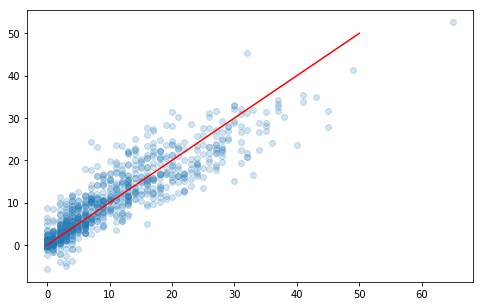

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_hat, alpha=1/5)
plt.plot([0, 50], [0, 50], c='r');

In [13]:
display(df.sample(5))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Micheal Ferland,24.0,LW,15,10,-1,106,26.0,149.0
Ryan Callahan,33.0,RW,7,10,7,76,25.0,89.0
Drew Stafford,22.0,RW,16,22,3,103,20.0,62.0
Tomas Hertl,24.0,C,22,24,-2,175,71.0,84.0
Brayden Schenn,21.0,C,8,18,-8,79,22.0,109.0


<h1>problems...</h1>
<ol>
    <li>can't make predictions on new data...</li>
    <li>not benchmarked...</li>
    <li><i>maybe</i> not using the right algorithm...</li>
</ol>
<br>
<div align="left">
    <img src="https://media.giphy.com/media/Bw7fyRylzteWk/giphy.gif" height="250" width="250">
</div>

<br>
<div align="center">
    <b><font size="+10">#YouSuckAtRegression</font></b>
</div>

<div align="center">
    <img src="https://i.imgur.com/GfJNU68.gif" height="600" width="600">
</div>

<h1>model preview</h1>
<ol>
    <li>Multiple output regression...</li>
    <li>Ordinal regression...</li>
    <li>Poisson regression...</li>
</ol>

<h1>problems</h1>
<ol>
    <li>...to predict player performance next year</li>
    <li>...to find diamonds in the rough</li>
    <li>...to choose the right side of the Over/Under</li>
</ol>

<div align="center">
    <img src="images/kramer.gif" height="400" width="400">
</div>

<div align="center">
    <h1>Multiple Output Regression</h1>
</div>

<div align="center">
    <img src="images/ymxb.png" height="500" width="500">
</div>

<div align="center">
    <img src="images/prediction_machine.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/prediction_machine_2.png" height="600" width="600">
</div>

In [15]:
import pandas as pd 

df = pd.read_csv('data/skaters.csv')
# quick clean
df['season_start'] = df['season'].apply(lambda x: int(x[:4]))
df = df.query('season_start >= 2007')
df['position'] = df['position'].apply(
    lambda x: 'Multiple' if '/' in x else x)

In [16]:
Y_columns = [
    'goals', 'assists', 'plus_minus', 
    'shots_on_goal', 'blocks', 'hits']
X_columns = ['position', 'age'] + Y_columns

In [17]:
display(
    df[['name', 'season'] + X_columns]
    .query('name == "Mitch Marner"')
)

name,season,position,age,goals,assists,plus_minus,shots_on_goal,blocks,hits
Mitch Marner,2016-17,C,19.0,19,42,0,176,39.0,41.0
Mitch Marner,2017-18,C,20.0,22,47,-1,194,25.0,31.0
Mitch Marner,2018-19,C,21.0,26,68,22,233,43.0,29.0


In [18]:
# shift everything by a year 
Y = df.groupby('id')[Y_columns].shift(-1)
X = df[X_columns]
# drop out dangling Y rows...
X = X[~pd.isnull(Y).any(axis=1)]
Y = Y.dropna()
# reset index
Y = Y.reset_index(drop=True)
X = X.reset_index(drop=True)
# this is me shifting:
HTML('<img src="https://media.giphy.com/media/5FTe65sKNVfEc/giphy.gif" height="100" width="100">')

In [19]:
display(X.head(5), index=True)

,position,age,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,C,22.0,0,3,2,9,2.0,0.0
1,D,23.0,0,3,-2,12,9.0,6.0
2,C,18.0,18,34,-2,134,33.0,38.0
3,C,19.0,4,20,3,78,27.0,27.0
4,C,20.0,19,37,-12,178,35.0,72.0


In [20]:
display(Y.head(4), index=True)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,0.0,8.0,2.0,52.0,10.0,3.0
1,0.0,6.0,9.0,42.0,35.0,33.0
2,4.0,20.0,3.0,78.0,27.0,27.0
3,19.0,37.0,-12.0,178.0,35.0,72.0


In [21]:
X_train, X_test, Y_train, Y_test = (
    train_test_split(X, Y, test_size=0.2, random_state=42)
)

<div align="center">
    <img src="images/secret_sauce.jpg" height="600" width="600">
</div>

In [22]:
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.preprocessing import PolynomialFeatures, LabelBinarizer
from sklearn.impute import SimpleImputer

mapper = DataFrameMapper([
    (['age'], [SimpleImputer(), PolynomialFeatures(include_bias=False)]),
    (['position'], [CategoricalImputer(), LabelBinarizer()]),
    (['goals'], SimpleImputer()),
    (['assists'], SimpleImputer()),
    (['plus_minus'], SimpleImputer()),
    (['shots_on_goal'], SimpleImputer()),
    (['blocks'], SimpleImputer()),
    (['hits'], SimpleImputer())
])

In [23]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [24]:
from sklearn.multioutput import MultiOutputRegressor

multi_model = MultiOutputRegressor(LinearRegression())
multi_model.fit(Z_train, Y_train)

HTML('<img src="https://media.giphy.com/media/12NUbkX6p4xOO4/giphy.gif" height="200" width="200">')

In [25]:
display(pd.DataFrame(Z_test, columns=mapper.transformed_names_)
    [Y_columns].head(2),index=True
)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,0.0,0.0,-1.0,0.0,1.0,3.0
1,21.0,39.0,19.0,152.0,54.0,77.0


In [26]:
display(pd.DataFrame(multi_model.predict(Z_test), columns=Y_columns)
    .head(2), index=True
)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,2.365496,7.729889,-1.287782,50.991012,38.849421,45.008994
1,17.306302,32.612045,5.246068,148.247476,49.772165,68.536912


<div align="center">
    <img src="images/deeper.jpg" height="600" width="600">
</div>

In [27]:
y_sog = Y['shots_on_goal']
y_goals = Y['goals']

In [28]:
(X_train, X_test, 
 y_sog_train, y_sog_test, 
 y_goals_train, y_goals_test) = train_test_split(
    X, y_sog, y_goals,
    test_size=0.2, random_state=42
)

HTML('<img src="https://media.giphy.com/media/EldfH1VJdbrwY/giphy.gif" height="100" width="100">')

In [29]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [30]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import Dense, Dropout

<div align="center">
    <img src="images/network.png" height="400" width="400">
</div>

<div align="center">
    <img src="https://media.giphy.com/media/LAdk84Ns5vzuo/giphy.gif" height="250" width="250">
</div>

In [41]:
data_input = Input(shape=(Z_train.shape[1],), dtype='float64', name='last_season')

x = Dense(200, activation='relu')(data_input)
x = Dense(200, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)

goals_prediction = Dense(1, name='goals')(x)
sog_prediction = Dense(1, name='shots_on_goal')(x)
model = Model(data_input, [goals_prediction, sog_prediction])

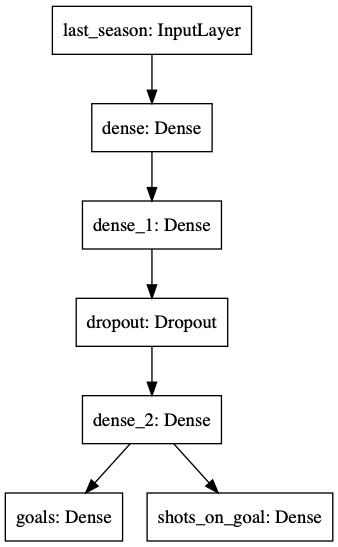

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [42]:
model.compile(
    optimizer='Nadam',
    loss={'goals': 'mse', 'shots_on_goal': 'mse'},
    loss_weights={'goals': 10, 'shots_on_goal': 1 / 10},
)
model.fit(Z_train, [y_goals_train, y_sog_train], epochs=10, batch_size=2)

Epoch 1/10
2874/2874 [==============================] - 3s 942us/sample - loss: 1612.8311 - goals_loss: 120.5464 - shots_on_goal_loss: 4073.6589
Epoch 2/10
2874/2874 [==============================] - 2s 815us/sample - loss: 977.9069 - goals_loss: 65.1779 - shots_on_goal_loss: 3261.2793
Epoch 3/10
2874/2874 [==============================] - 2s 815us/sample - loss: 913.9532 - goals_loss: 59.4364 - shots_on_goal_loss: 3195.8928
Epoch 4/10
2874/2874 [==============================] - 2s 816us/sample - loss: 843.5828 - goals_loss: 54.6551 - shots_on_goal_loss: 2970.3181
Epoch 5/10
2874/2874 [==============================] - 2s 844us/sample - loss: 806.2263 - goals_loss: 52.0056 - shots_on_goal_loss: 2861.6997
Epoch 6/10
2874/2874 [==============================] - 2s 827us/sample - loss: 797.4674 - goals_loss: 52.0536 - shots_on_goal_loss: 2769.3137
Epoch 7/10
2874/2874 [==============================] - 2s 823us/sample - loss: 756.1912 - goals_loss: 48.9705 - shots_on_goal_loss: 2664.85

In [43]:
X_test.sample(1).to_dict(orient='list')

{'position': ['LW'],
 'age': [25.0],
 'goals': [17],
 'assists': [35],
 'plus_minus': [8],
 'shots_on_goal': [162],
 'blocks': [66.0],
 'hits': [141.0]}

In [44]:
X_new = pd.DataFrame({
    'position': ['C'],
    'age': [29.0],
    'goals': [19],
    'assists': [21],
    'plus_minus': [2],
    'shots_on_goal': [155],
    'blocks': [47.0],
    'hits': [255.0]
})
Z_new = mapper.transform(X_new)
model.predict(Z_new)

[array([[12.88187295]]), array([[129.47075138]])]

In [46]:
y_hat_goals = model.predict(Z_test)[0][:, 0]
y_hat_sog = model.predict(Z_test)[1][:, 0]

preds = pd.DataFrame({
    'goals': y_goals_test,
    'goals_predicted': y_hat_goals,
    'sog': y_sog_test,
    'sog_predicted': y_hat_sog,
})

print(r2_score(preds['goals'], preds['goals_predicted']))
print(r2_score(preds['sog'], preds['sog_predicted']))

# HTML('<img src="https://media.giphy.com/media/l1J9O9elEvuRjMyXu/giphy.gif" height="250" width="250">')

0.5575444059472623
0.5257034809003149


<div align="center">
    <img src="https://media.giphy.com/media/Z7hAjvqppsuVG/giphy.gif" height="500" width="500">
</div>



In [89]:
df = pd.read_csv('data/draft.csv')
display(df.iloc[:, :10].head())

name,position,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks
Connor McDavid,C,1,40.2750,69.665000,13.217500,19.75,208.250000,15.0,17.750000
Nikita Kucherov,RW,2,41.5150,56.670000,17.495000,28.50,214.750000,20.0,10.500000
Alex Ovechkin,LW,3,50.2300,39.236667,17.126667,21.00,245.666667,65.0,9.333333
Sidney Crosby,C,4,35.7775,62.445000,14.142500,28.75,197.500000,34.0,15.750000
Brad Marchand,LW,5,38.3900,52.975000,19.537500,20.00,174.250000,25.0,15.750000


<div align="center">
    <img src="images/nhl_blotto.png" height="500" width="800">
</div>

<div align="center">
    <img src="images/nhl_blotto_2b.png" height="500" width="800">
</div>

In [90]:
categories = [
    'goals',
    'assists',
    'plus_minus',
    'powerplay_points',
    'shots_on_goal',
    'hits',
    'blocks',
    'wins',
    'goals_against_average',
    'saves',
    'save_percentage',
    'shutouts'
]

y = df['adp']
X = df[['position'] + categories]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=5)

In [93]:
from sklearn.preprocessing import StandardScaler

mapper = DataFrameMapper([
    (['position'], LabelBinarizer()),
    (['goals'], StandardScaler()),
    (['assists'], StandardScaler()),
    (['plus_minus'], StandardScaler()),
    (['powerplay_points'], StandardScaler()),
    (['shots_on_goal'], StandardScaler()),
    (['hits'], StandardScaler()),
    (['blocks'], StandardScaler()),
    (['wins'], StandardScaler()),
    (['goals_against_average'], StandardScaler()),
    (['saves'], StandardScaler()),
    (['save_percentage'], StandardScaler()),
    (['shutouts'], StandardScaler())])

In [94]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [95]:
model = LinearRegression()
model.fit(Z_train, y_train)
model.predict(Z_test)[:10]

array([ 48.41389296,  55.63518889, -11.75859152,  40.77822351,
       137.50479356, 170.48747709,  89.30467878,  64.04388235,
        94.40890631,  62.47600084])

<div align="center">
    <img src="https://media.giphy.com/media/14vK3Sc3zepWM0/giphy.gif" height="300" width="300">
</div>

<div align="center">
    <h1>Ordinal Regression</h1>
</div>

In [96]:
#!pip install mord
from mord import OrdinalRidge

model = OrdinalRidge(fit_intercept=False)

In [97]:
model.fit(Z_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
model.predict(Z_test)[:10] + 1

array([ 48.,  54.,   1.,  37., 134., 164.,  81.,  63.,  87.,  65.])

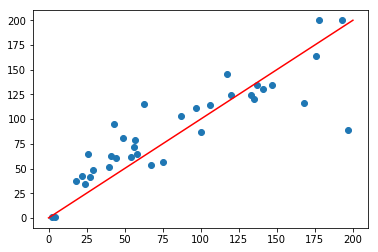

In [100]:
compare = pd.DataFrame({
    'y': y_test, 'yhat': model.predict(Z_test) + 1})

plt.scatter(compare.y, compare.yhat)
plt.plot([0, 200], [0, 200], c='r');

In [101]:
r2_score(compare.y, compare.yhat)

0.7472513693545548

In [103]:
bias = pd.DataFrame({
    'feature': mapper.transformed_names_,
    'coef': model.coef_
}).sort_values('coef')

display(bias[~bias.feature.str.contains('position')])

feature,coef
wins,-53.326332
assists,-43.783531
goals,-39.414865
shots_on_goal,-19.420086
goals_against_average,-12.000836
saves,-6.835524
save_percentage,-6.004746
hits,-5.807997
powerplay_points,-5.614948
plus_minus,-5.508739


<div align="center">
    <img src="images/nhl_blotto_2.png" height="500" width="800">
</div>

![](images/my_draft.png)

<div align="center">
    <img src="images/results.png" height="500" width="500">
</div>

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)

<div align="center">

    twitter: @maxhumber
    linkedin: /in/maxhumber
    email: maxhumber@gmail.com

</div>